In [99]:
import numpy as np

In [103]:
import cv2 

In [87]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

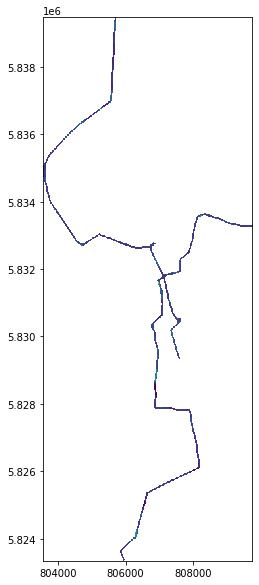

<AxesSubplot:>

In [88]:
img = rasterio.open('SixBands.tif')
plt.figure(figsize=(15,10))
show(img)

In [89]:
# image resolution
print(img.height, img.width)

# number of bands
print(img.count)

807 311
6


In [145]:
band1 = img.read(1)
band2 = img.read(2)
band3 = img.read(3)
band4 = img.read(4)
band5 = img.read(5)
band6 = img.read(6)
full_img = img.read()

In [146]:
band1 = np.nan_to_num(band1, nan = 0)
band2 = np.nan_to_num(band2, nan = 0)
band3 = np.nan_to_num(band3, nan = 0)
band4 = np.nan_to_num(band4, nan = 0)
band5 = np.nan_to_num(band5, nan = 0)
band6 = np.nan_to_num(band6, nan = 0)

full_img = np.nan_to_num(full_img, nan = 0)

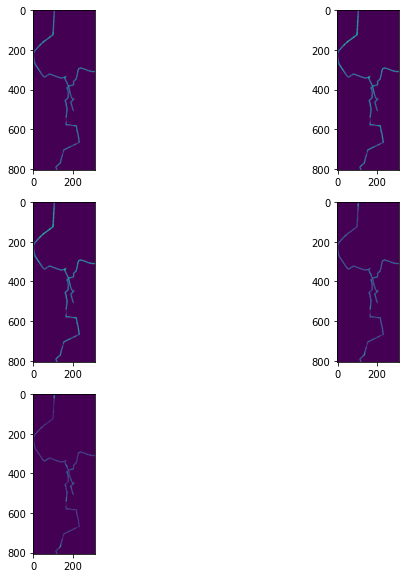

In [148]:
plt.figure(figsize= (10,10))
for i in range(1, 6):
    plt.subplot(3,2,i)
    plt.imshow(full_img[i])

In [149]:
cropped_full_img = full_img[:,350:450, 150:200]

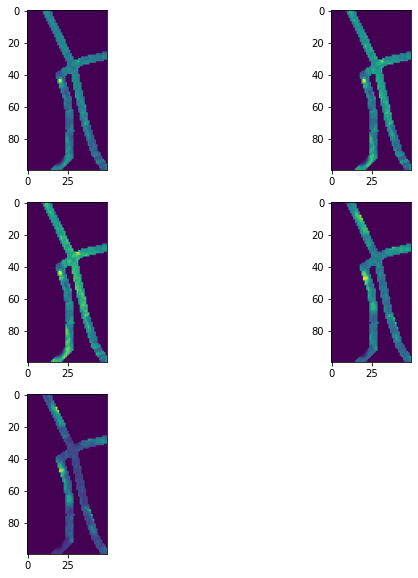

In [151]:
plt.figure(figsize= (10,10))
for i in range(1,6):
    plt.subplot(3,2,i)
    plt.imshow(cropped_full_img[i])

In [167]:
print(img.tags())
print(img.profile)
print(img.crs)

{'AREA_OR_POINT': 'Area'}
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 311, 'height': 807, 'count': 6, 'crs': CRS.from_epsg(32632), 'transform': Affine(20.0, 0.0, 803540.0,
       0.0, -20.0, 5839480.0), 'tiled': False, 'interleave': 'pixel'}
EPSG:32632


In [176]:
img.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 311,
 'height': 807,
 'count': 6,
 'crs': CRS.from_epsg(32632),
 'transform': Affine(20.0, 0.0, 803540.0,
        0.0, -20.0, 5839480.0)}

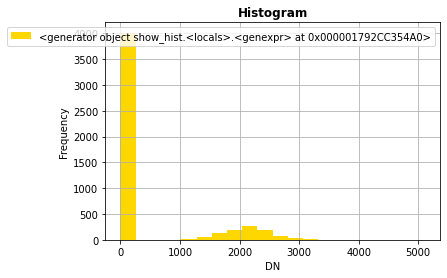

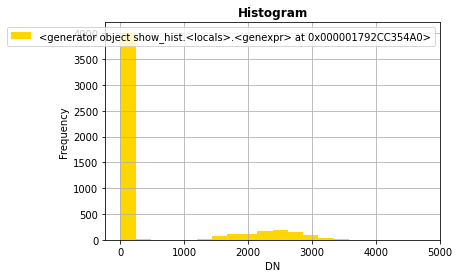

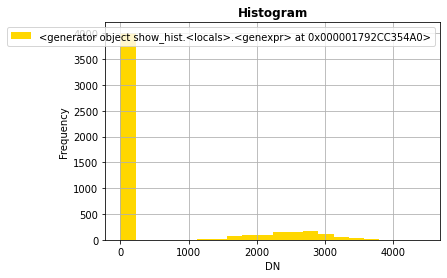

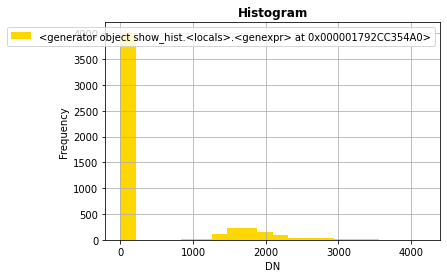

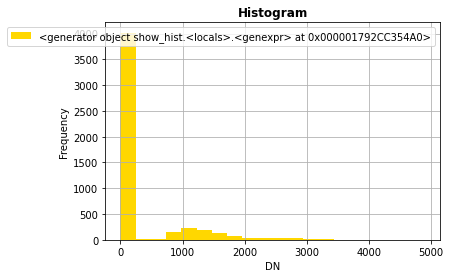

In [190]:
for i in range(1,6):
    rasterio.plot.show_hist(cropped_full_img[i], bins = 20)

# Canny Edge Detection

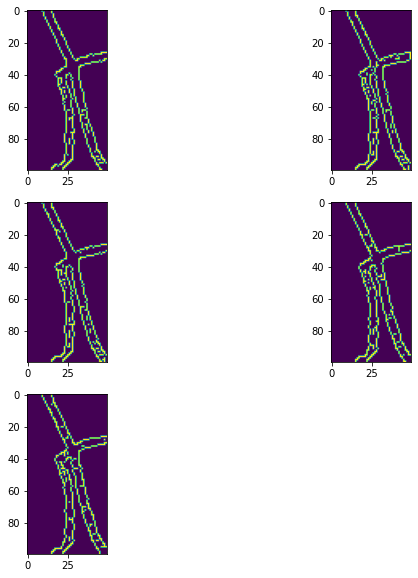

In [195]:
# normalization 
norm_cropped_full_img = (cropped_full_img - cropped_full_img.min())/(cropped_full_img.max()-cropped_full_img.min())
norm_cropped_full_img = np.array(norm_cropped_full_img*255).astype(np.uint8)

edge = np.zeros(shape= norm_cropped_full_img.shape)
plt.figure(figsize=(10,10))
for i in range(1, 6):
    edge[i] = cv2.Canny(norm_cropped_full_img[i], 1,200) 
    plt.subplot(3,2,i)
    plt.imshow(edge[i])
    
    

# Filtering 

In [202]:
def freqLowPassFiltering(img,size):#Transfer parameters are Fourier transform spectrogram and filter size
    h, w = img.shape[0:2]#Getting image properties
    h1,w1 = int(h/2), int(w/2)#Find the center point of the Fourier spectrum
    img2 = np.zeros((h, w), np.uint8)#Define a blank black image with the same size as the Fourier Transform Transfer
    img2[h1-int(size/2):h1+int(size/2), w1-int(size/2):w1+int(size/2)] = 1#Center point plus or minus half of the filter size, forming a filter size that defines the size, then set to 1, preserving the low frequency part
    img3=img2*img #A low-pass filter is obtained by multiplying the defined low-pass filter with the incoming Fourier spectrogram one-to-one.
    return img3

In [209]:
def lowPassFilter(img, thresh):
    # Fourier transform

    img_dft = np.fft.fft2(img)
    dft_shift = np.fft.fftshift(img_dft)  # Move frequency domain from upper left to middle

    # Low-pass filter
    dft_shift = freqLowPassFiltering(dft_shift, thresh)
    #res = np.log(np.abs(dft_shift))

    # Inverse Fourier Transform
    idft_shift = np.fft.ifftshift(dft_shift)  # Move the frequency domain from the middle to the upper left corner
    ifimg = np.fft.ifft2(idft_shift)  # Fourier library function call
    ifimg = np.abs(ifimg)
    #cv2.imshow("ifimg", np.int8(ifimg))
    #cv2.imshow("gray", gray)
    
    return ifimg 

1
2
3
4
5


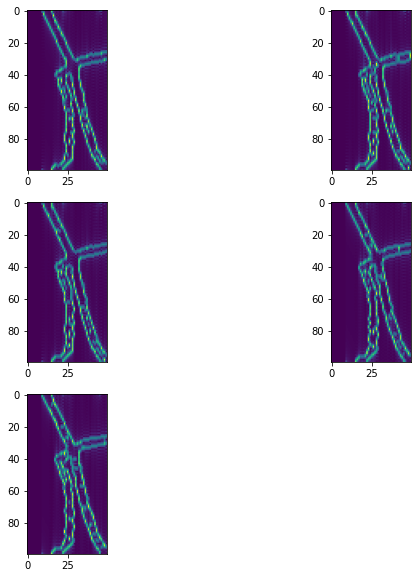

In [212]:
low_img = np.zeros(shape = edge.shape)

plt.figure(figsize = (10,10))
for i in range(1,7):
    print(i)
    low_img[i] = lowPassFilter(edge[i], 50)
    plt.subplot(3,2,i)
    plt.imshow(low_img[i])
    